In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
cutoff = 300
df = pd.read_csv('real_data/OD_exp.csv',header=None, names=['OD_dil','22','222','2222'])
df['OD_dil'] = df['OD_dil'].fillna(method='ffill')
OD_label = [    float(i.split('"')[1])  for i in df['OD_dil'] ]

df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
df.iloc[:,3] = pd.to_numeric(df.iloc[:,3], errors='coerce').fillna(0)

ks = df.to_numpy()[:,1:4]
dil_schedule = np.array((20,200,2000))#/.9



/tmp/ipykernel_14236/4000393685.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_14236/4000393685.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
/tmp/ipykernel_14236/4000393685.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df

In [3]:
cts,dils =[],[]
for k_line in ks:
    index = np.argmax(k_line <= cutoff) if np.any(ks <= cutoff) else len(ks) - 1
    cts.append( k_line[index] )
    dils.append( dil_schedule[index] )
    #print('Day ')

cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)

In [4]:
od = np.array([float(d.split('"')[1]) for d in df['OD_dil']])
od

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

(array([1.63924654e-04, 2.38435861e-04, 8.94134478e-05, 1.04315689e-04,
        1.49022413e-05, 5.96089652e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.47067239e-05]),
 array([  220.,  1618.,  3016.,  4414.,  5812.,  7210.,  8608., 10006.,
        11404., 12802., 14200.]),
 <BarContainer object of 10 artists>)

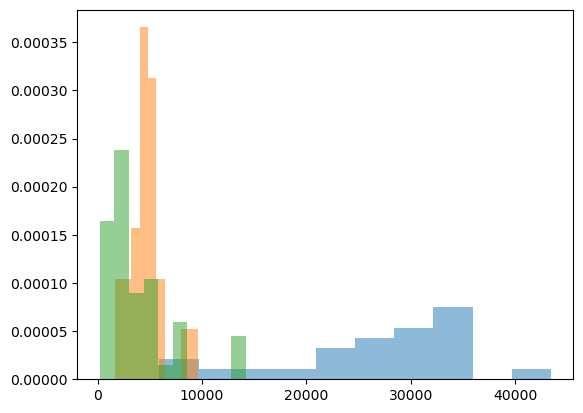

In [5]:
#plt.hist(np.log10(cts*dils)[od==1.],alpha=.5,density=True)
plt.hist((cts*dils)[od==.5],alpha=.5,density=True)
plt.hist((cts*dils)[od==.1],alpha=.5,density=True)
plt.hist((cts*dils)[od==.01],alpha=.5,density=True)

(array([0.04491929, 0.04491929, 0.17967716, 0.40427361, 0.76362794,
        1.07806297, 0.58395078, 0.26951574, 0.26951574, 0.71870865]),
 array([2.34242268, 2.57192939, 2.80143609, 3.0309428 , 3.2604495 ,
        3.48995621, 3.71946291, 3.94896961, 4.17847632, 4.40798302,
        4.63748973]),
 <BarContainer object of 10 artists>)

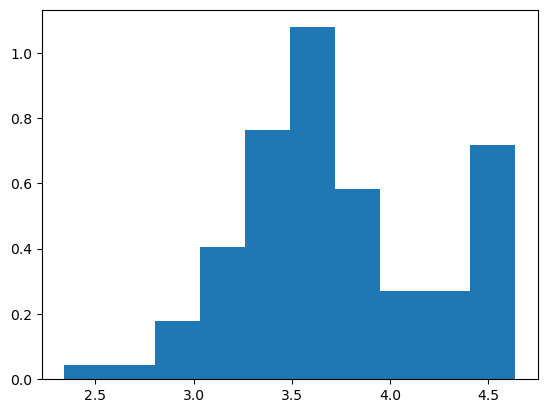

In [6]:
plt.hist(np.log10(cts*dils)[od!=1],density=True)

In [7]:
data =  dataset(cts[od!=1],dils[od!=1],cutoff)

In [8]:
data.counts.numel()

97

In [9]:
data.evaluate(components=int(np.sqrt(data.counts.numel())))

9
11.110887688486736 -926.0846633890288 -144.45076129648942
7.823883477529345 -655.8102603174912 -101.82734726277066
7.239743968564149 -616.1069316679952 -86.01947250375737
7.161551853213052 -615.5046346739321 -79.12960500492193
7.130918423650915 -616.6382239983806 -75.03913701127178
7.104387464037771 -617.0900843613044 -72.00795366788883
7.094041219440552 -617.468108313459 -70.64793225071176
7.084905364747477 -617.3334602718897 -69.89219702029934
7.0731620701862585 -617.3122894981493 -68.77470212899976
7.064348276280636 -617.5362515372835 -67.69887920186584
7.058345879403437 -617.7980945422896 -66.85596834855698
7.0486588084823865 -617.8954264993797 -65.81597965725251
7.041201210216216 -618.0251394449642 -64.96727265186252
7.035422356236678 -618.1698232157553 -64.2550742881152
7.019769189921738 -617.9681771604384 -62.931899025078046
7.0069816427209695 -617.6766858439769 -61.992660143357355
7.001510161415655 -617.5882408061364 -61.554558371552446
6.997887576446353 -617.6490677657966 -6

(tensor([ 5729.4862, 29921.7212,  2559.0974,  4454.9115, 10019.7846,  1403.6013,
          1239.6663,   735.6421,   179.4614], device='cuda:0',
        dtype=torch.float64),
 tensor([ 971.7097, 4649.4807,  464.4393, 1347.3167, 3898.9656,  387.4362,
          358.6669,  313.6167,   54.7901], device='cuda:0', dtype=torch.float64),
 tensor([0.2350, 0.2074, 0.1476, 0.1323, 0.1101, 0.0675, 0.0524, 0.0313, 0.0164],
        device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/dataset_class.py:230: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()*bins[-1]).astype(int))


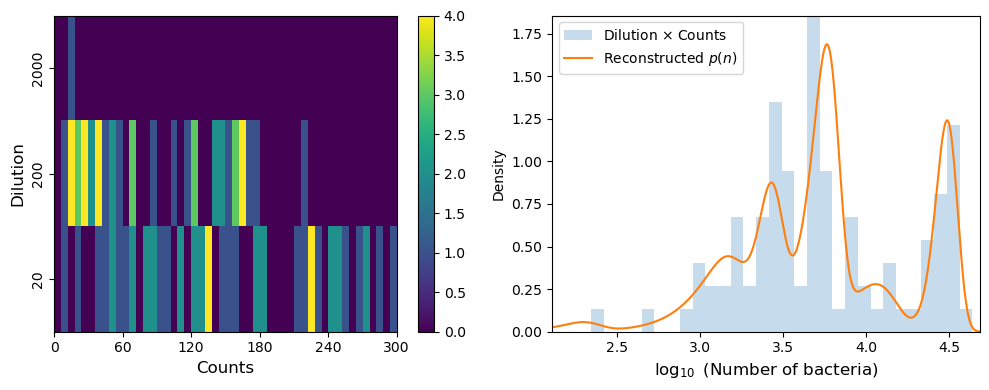

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
data.dill_imshow(ax[0],fig)
data.log_plots(ax[1])
plt.tight_layout()
ax[1].legend()

plt.savefig('graphs/3dils.png',dpi=500)

(array([0.11510983, 0.11510983, 0.11510983, 0.46043933, 0.57554916,
        1.15109832, 1.15109832, 0.92087866, 0.57554916, 0.3453295 ]),
 array([2.34242268, 2.52340925, 2.70439581, 2.88538238, 3.06636895,
        3.24735551, 3.42834208, 3.60932865, 3.79031521, 3.97130178,
        4.15228834]),
 <BarContainer object of 10 artists>)

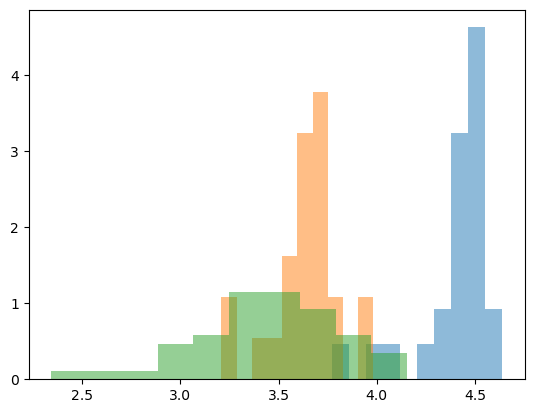

In [11]:
plt.hist(np.log10(cts*dils)[od==.5],alpha=.5,density=True)
plt.hist(np.log10(cts*dils)[od==.1],alpha=.5,density=True)
plt.hist(np.log10(cts*dils)[od==.01],alpha=.5,density=True)

(array([0.11510983, 0.11510983, 0.11510983, 0.46043933, 0.57554916,
        1.15109832, 1.15109832, 0.92087866, 0.57554916, 0.3453295 ]),
 array([2.34242268, 2.52340925, 2.70439581, 2.88538238, 3.06636895,
        3.24735551, 3.42834208, 3.60932865, 3.79031521, 3.97130178,
        4.15228834]),
 <BarContainer object of 10 artists>)

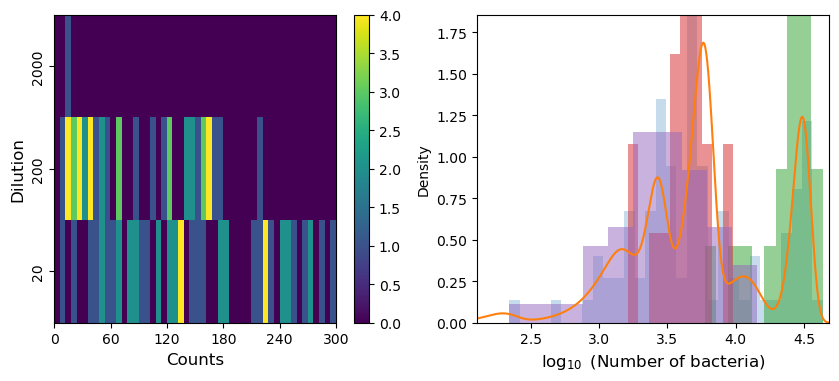

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
data.dill_imshow(ax[0],fig)
data.log_plots(ax[1])

ax[1].hist(np.log10(cts*dils)[od==.5],alpha=.5,density=True)
ax[1].hist(np.log10(cts*dils)[od==.1],alpha=.5,density=True)
ax[1].hist(np.log10(cts*dils)[od==.01],alpha=.5,density=True)

# from dataset_class import Igaussmix_loglike
# l10 = 2.30
# x = torch.arange(1,1000000).cpu()

# m = torch.tensor((1.04*1e9,6.43*1e8,1.5*1e8,1.6*1e7))/(5*1e3)
# s = torch.sqrt(m)
# r = torch.ones(4)/4

# p = torch.exp(Igaussmix_loglike(x,m.cpu(),s.cpu(),r.cpu())) 
# y_ev = p*x*l10
# ax[1].plot(np.log10(x),y_ev.numpy(),color='k',label='GT')
# ax[1].set_xlim(2.5,6)


# plt.tight_layout()
# ax[1].legend()


In [13]:
(cts*dils)

array([32800., 37600., 20000., 34000., 43200., 19600., 52800., 42000.,
       55400., 32200., 58800., 28200.,  7000., 20600., 43200., 28000.,
       34000., 22200., 44400., 26600., 28800., 22600.,  3000., 58000.,
       58600., 31200., 31600., 35800., 20800., 43400., 24000., 34200.,
       28000., 28800., 33400., 29200., 32200.,  9600., 32400., 27800.,
       28400., 24400., 25000., 16800., 32600., 11600., 30000., 33000.,
        5920., 23000.,  2720.,  1780.,  4500.,  4460.,  8200.,  4340.,
        3660.,  4960.,  5280.,  5500.,  1620.,  5040.,  2800.,  9600.,
        4300.,  4440.,  6200.,  3500.,  3500.,  4820.,  5500.,  5660.,
        4800.,  4600.,  3600.,  4540.,  2420.,  5200.,  2520.,  1040.,
        3040.,  2800.,  1600.,  1000.,  2000.,  1360.,   940.,  3660.,
        2440.,  2620.,  2640.,  2800.,   460.,  2700.,  1800.,  3180.,
        1280.,  1100.,  3400.,   760.,  4600.,  2920.,  5200.,  1700.,
        2200.,  2000.,  7600.,  2200.,   220., 13200.,  5200.,  4400.,
      